In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
rawdata = pd.read_csv('cleaned data.csv')
print(rawdata.columns)
data = rawdata.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'], axis=1)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days', 'Marital', 'Spent',
       'Family_Size'],
      dtype='object')


<AxesSubplot:>

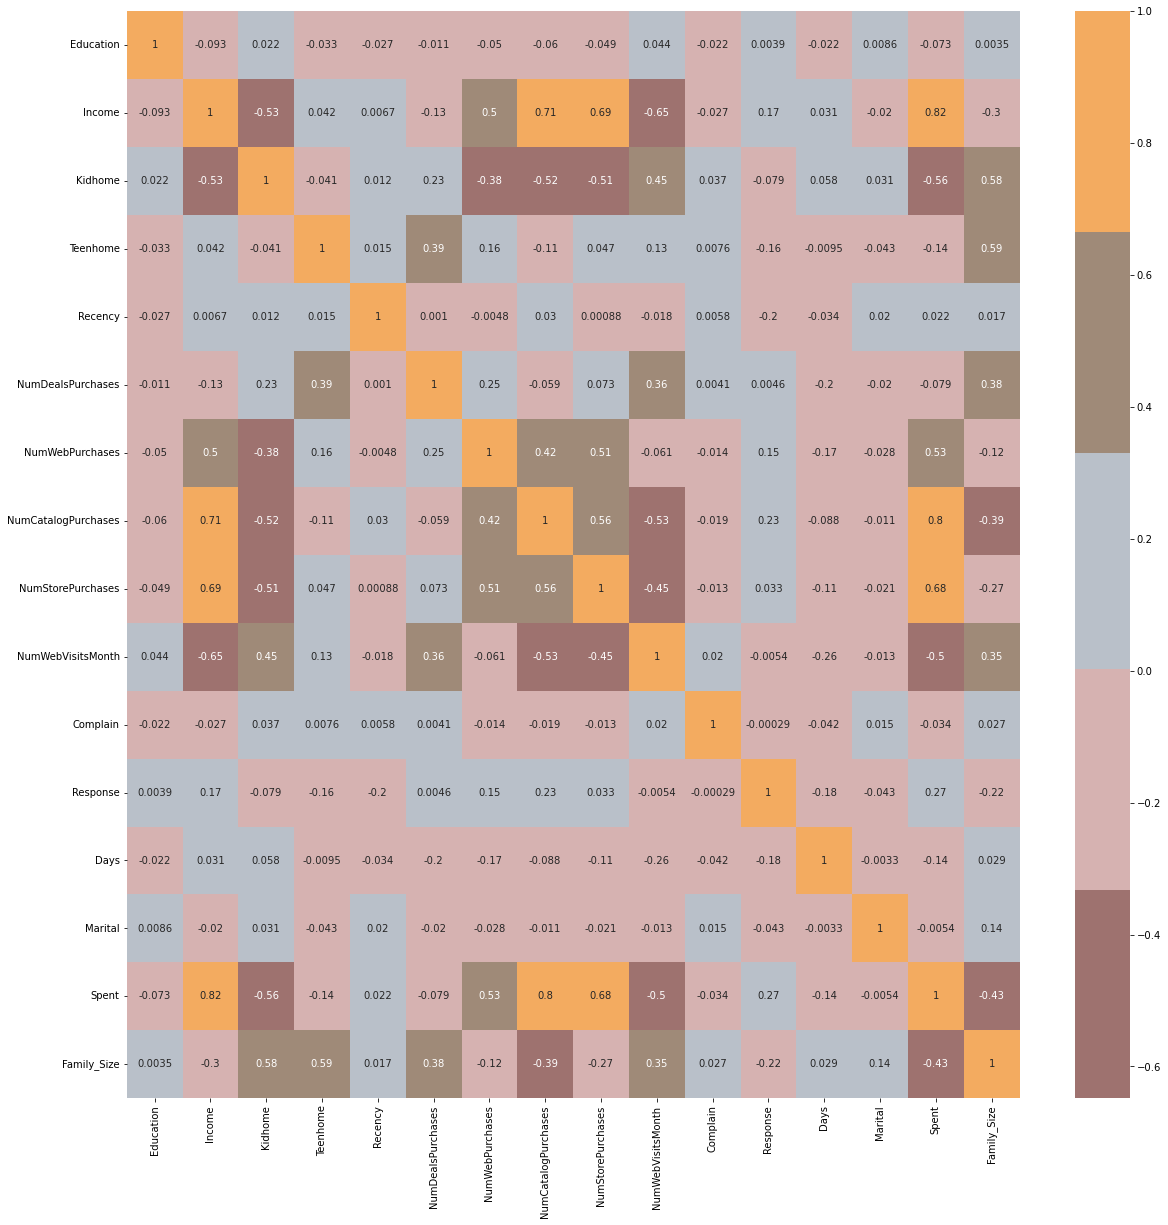

In [4]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
plt.figure(figsize=(20,20)) 
sns.heatmap(data.corr(),cmap=cmap,annot=True,center=0)

# Multivariate statistical analysis
1. PCA commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data’s variation as possible
2. The hyperparameter of PCA is the components. In the case, I will compute the percentage of variance explained each of the selected components to determine the best components.


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2204 non-null   float64
 1   Income               2204 non-null   float64
 2   Kidhome              2204 non-null   float64
 3   Teenhome             2204 non-null   float64
 4   Recency              2204 non-null   float64
 5   NumDealsPurchases    2204 non-null   float64
 6   NumWebPurchases      2204 non-null   float64
 7   NumCatalogPurchases  2204 non-null   float64
 8   NumStorePurchases    2204 non-null   float64
 9   NumWebVisitsMonth    2204 non-null   float64
 10  Complain             2204 non-null   float64
 11  Response             2204 non-null   float64
 12  Days                 2204 non-null   float64
 13  Marital              2204 non-null   float64
 14  Spent                2204 non-null   float64
 15  Family_Size          2204 non-null   f

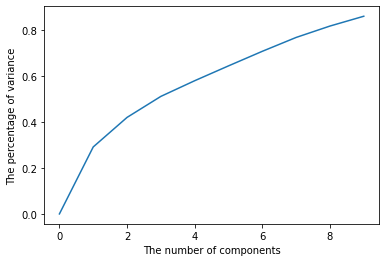

In [6]:
variance=[]
for i in range(10): 
    pca = PCA(n_components=i)
    pca.fit_transform(data)
    R_value = pca.explained_variance_ratio_
    variance.append(sum(R_value))
plt.xlabel('The number of components')
plt.ylabel('The percentage of variance')
plt.plot(range(10),variance)
plt.show()

In [7]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(data = pca_data, columns=['col1','col2','col3','col4'])

print(pca_data.head())
print('The dataset has been reduced to four dimensions')

       col1      col2      col3      col4
0 -2.960244  0.371266  3.415092  1.099200
1  1.999957 -0.603824 -1.615073 -1.088615
2 -1.959395 -0.351803 -0.325593 -0.009587
3  2.216569 -1.351923 -0.893777 -0.754990
4  0.423776  0.444305 -0.586775  0.840523
The dataset has been reduced to four dimensions


# Score analysis
The score plot can be used to investigate cluster, outliers and find out the time-based patterns.

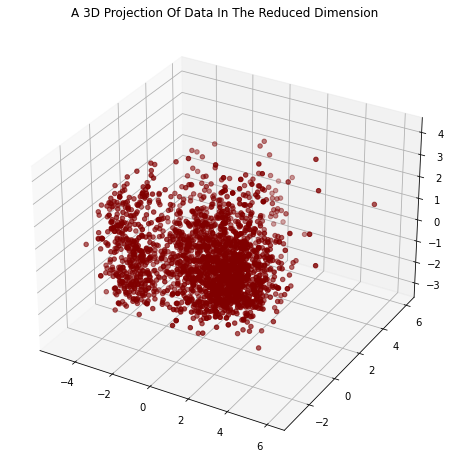

This customer group is separable.
There is a large amount of customers in common, which should be our target customer.


In [8]:
#clustering analysis
# Similar customers will fall close to each other
x = pca_data["col1"]
y = pca_data["col2"]
z = pca_data["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()
print('This customer group is separable.')
print('There is a large amount of customers in common, which should be our target customer.')

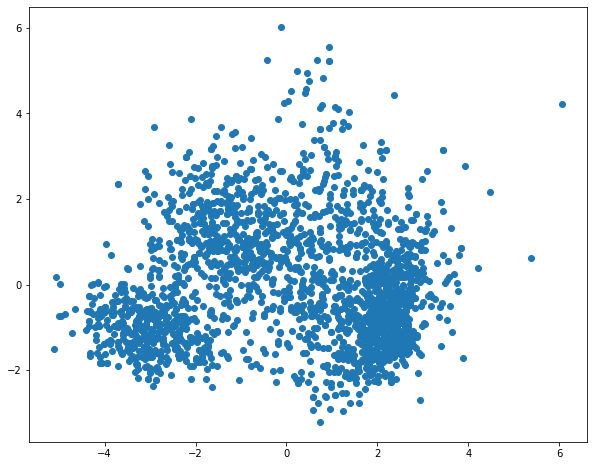

In [9]:
#The first two directions represent the greatest variation in the data.
#Investigating multivariate outlier
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()


In [10]:
data_score = pd.concat([rawdata,pca_data],axis=1) #combine the pca score with the initial dataset
outlier = data_score[(data_score['col1']>5)]
outlier.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Days,Marital,Spent,Family_Size,col1,col2,col3,col4
9,0.571826,-2.219581,1.038308,0.906152,0.657527,-0.824468,-0.664023,-0.731930,-0.670822,-0.635617,...,-0.095695,-0.421876,1.049655,1.383749,-0.927571,1.552216,5.376454,0.630974,0.738282,0.871213
1820,0.571826,-2.298034,1.038308,0.906152,-0.691264,-0.892621,-0.664023,-0.754891,-0.670822,-0.635617,...,-0.095695,-0.421876,1.488312,-0.582584,-0.994061,1.552216,6.049633,4.231842,1.782429,-0.897862


The sample appear to be evenly spread, which mean customer profile doesn't change with time


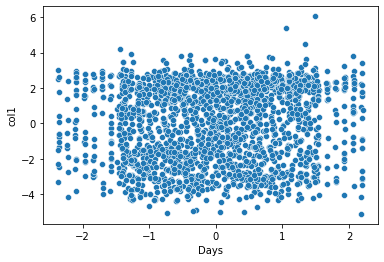

In [11]:
#Time-based trend analysis:
#The strong and consistent time-based trends in the raw data will be reflected in the scores too
# I want to if there any time-based pattern in customers
sns.scatterplot(x= data['Days'],y =pca_data['col1'])
print("The sample appear to be evenly spread, which mean customer profile doesn't change with time")

# Loading analysis
In order to divide the customer better, I'd like to investigate which features cause the difference among customers. One way to locate unimportant variables in the model is by finding which variables which have small weights in all components. And then, these variables can generally be removed, as they show no correlation to any of the components or with other variables. In another word, those variables have little importance or relevance in understanding the total variability in the system. Therefore, I'd like to investigate those features have high weights, which may causes in variance. 

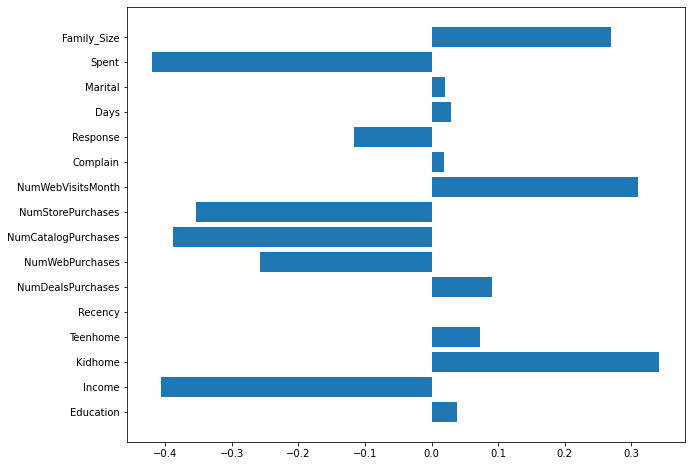

In [12]:
#It shows which variable(s) most contribute to the large score value
coeff = pca.components_[0] #the first score explains the greatest variation in the data
plt.figure(figsize=(10,8))
plt.barh(data.columns,coeff)
plt.show()


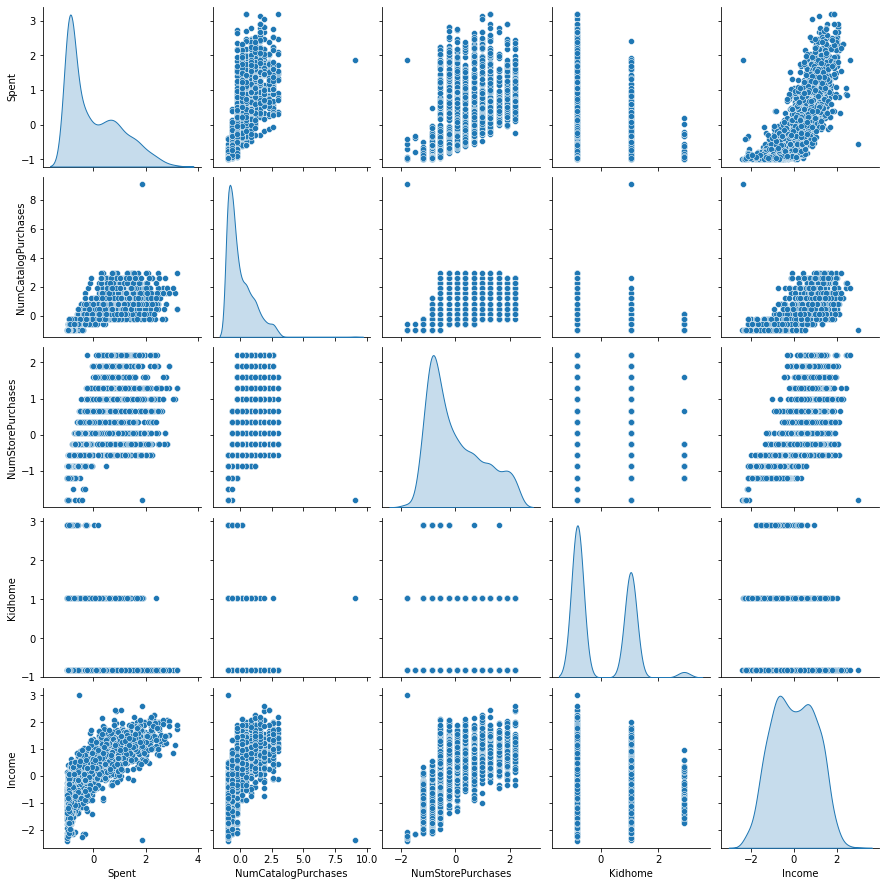

In [13]:
#analyze the correlated features
weighted_f = ['Spent','NumCatalogPurchases', 'NumStorePurchases','Kidhome','Income']
sns.pairplot(data[weighted_f],diag_kind='kde')

# Combination of scores and loadings
The combination of scores and loading can charaterized any observation in the dataset, expecially the multivariate outliers

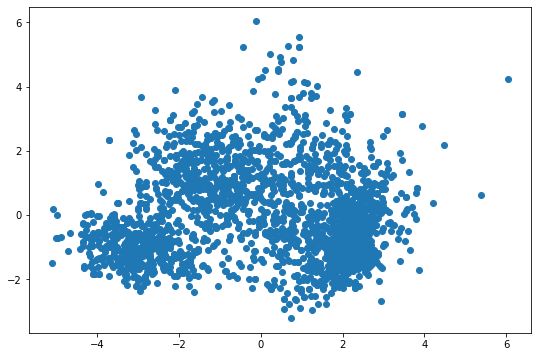

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(x,y)
plt.show()

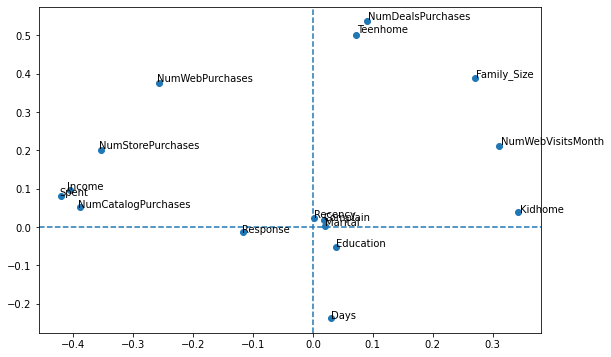

In [15]:
plt.figure(figsize=(9,6))
com0 = pca.components_[0]
com1 = pca.components_[1]
for i in range(len(com0)):
    plt.text(com0[i]*1.01,com1[i]*1.01,data.columns[i])
plt.scatter(com0,com1)
plt.axhline(ls='--')
plt.axvline(ls='--')
plt.show()

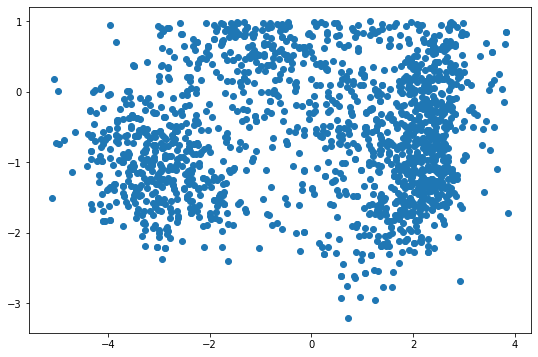

In [16]:
#remove unimportant variables which have little importance in understanding the differences 
data_score = data_score[(data_score['col1']<4)]
data_score = data_score[(data_score['col2']<4)]
data_score = data_score[(data_score['col2']<1)]
plt.figure(figsize=(9,6))
plt.scatter(data_score['col1'],data_score['col2'])
plt.show()

In [17]:
data_score.head()
# data_score.to_csv('pca_data',index=False)


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Days,Marital,Spent,Family_Size,col1,col2,col3,col4
0,-0.891943,0.314569,-0.823719,-0.931161,0.311683,0.974178,1.548116,1.747883,2.448550,1.479812,...,-0.095695,2.370363,-1.973635,0.400582,1.678816,-1.760647,-2.960244,0.371266,3.415092,1.099200
1,-0.891943,-0.254830,1.038308,0.906152,-0.380005,-0.874842,-0.638885,-0.731930,-0.652580,-0.635617,...,-0.095695,-0.421876,1.664635,0.400582,-0.964140,0.447928,1.999957,-0.603824,-1.615073,-1.088615
2,-0.891943,0.965125,-0.823719,-0.931161,-0.795017,0.354875,0.567737,-0.176268,1.335792,-0.149312,...,-0.095695,-0.421876,0.172342,1.383749,0.280875,-0.656360,-1.959395,-0.351803,-0.325593,-0.009587
3,-0.891943,-1.205824,1.038308,-0.931161,-0.795017,-0.874842,-0.563471,-0.667638,-0.506644,-0.586987,...,-0.095695,-0.421876,1.922668,1.383749,-0.920922,0.447928,2.216569,-1.351923,-0.893777,-0.754990
4,0.571826,0.322052,1.038308,-0.931161,1.556721,-0.394808,0.416909,-0.217598,0.150066,-0.003420,...,-0.095695,-0.421876,0.821726,-0.582584,-0.307557,0.447928,0.423776,0.444305,-0.586775,0.840523


In [37]:
pca_com = pd.DataFrame(pca.components_.T,columns=['com1','com2','com3','com4'])
pca_com = pd.concat([pd.Series(data.columns),pca_com],axis=1)
pca_com.to_csv("pca_com",index=False)

